# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

our task is to predict survival in titanic

In [2]:
df=pd.read_csv("C:/Users/Lenovo/Desktop/dataset/New folder/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

the dataset has 891 rows and 12 column

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


checking null values

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

these are the unique values in the below columns

In [9]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [10]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [11]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [13]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


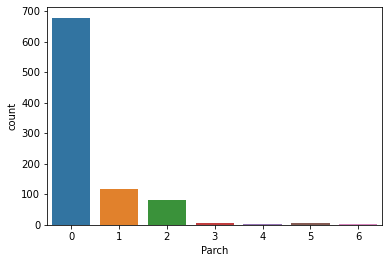

In [14]:
sns.countplot(x=df['Parch'],data=df)
print(df['Parch'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


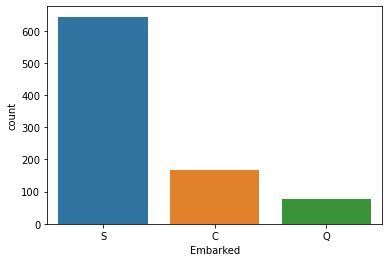

In [15]:
sns.countplot(x=df['Embarked'],data=df)
print(df['Embarked'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


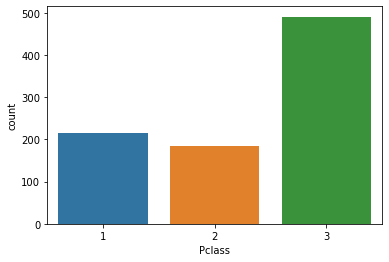

In [16]:
sns.countplot(x=df['Pclass'],data=df)
print(df['Pclass'].value_counts())

in ist class 216,in 2nd class 184,in 3rd class 184 are present

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


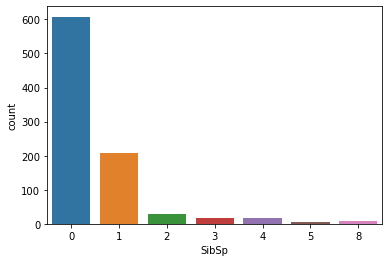

In [17]:
sns.countplot(x=df['SibSp'],data=df)
print(df['SibSp'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


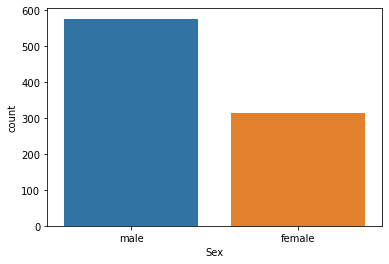

In [18]:
sns.countplot(x=df['Sex'],data=df)
print(df['Sex'].value_counts())

in the ship there are 577 males and 314 females present

In [19]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


0    549
1    342
Name: Survived, dtype: int64


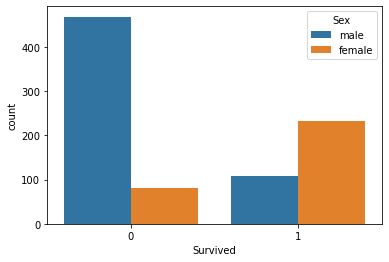

In [20]:
sns.countplot(x=df['Survived'],hue='Sex',data=df)
print(df['Survived'].value_counts())

out of 891 passengers 342 are survived and 549 are not survived and females are approxmately more survived than males

In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Replacing Null values

replace nan values of age column by median of it

In [22]:
df['Age']=df['Age'].fillna((df['Age'].median()))
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we remove cabin column as it has 687 null values from 891 raws

In [23]:
df.drop('Cabin',axis=1,inplace=True)

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [25]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

from above graph of embarked column there are 3 unique values such as S,C,Q.S is the highest no. of 644 records.so we replace these 2 nan values with S

In [26]:
df['Embarked']=df['Embarked'].replace(np.nan,'S')

so we remove all the null values from the dataset

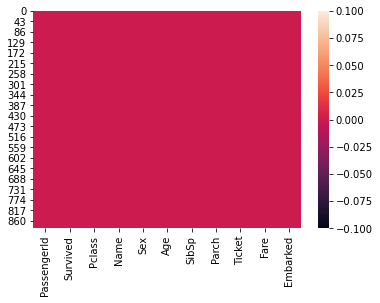

In [27]:
sns.heatmap(df.isnull())

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Sex and Embarked column has catagory features so we labelencode it by using encoding technique

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [30]:
df['Sex']=le.fit_transform(df['Sex'])

In [31]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [32]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0


In [33]:
df.describe()#statistical analysis

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


from above we found that some outlier may present in Fare column as std is more

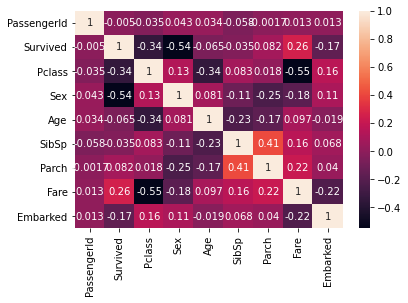

In [34]:
sns.heatmap(df.corr(),annot=True)

In [35]:
from sklearn.preprocessing import OrdinalEncoder
od=OrdinalEncoder()

In [36]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=od.fit_transform(df[i].values.reshape(-1,1))

In [37]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108.0,1,22.0,1,0,523.0,7.2500,2
1,2,1,1,190.0,0,38.0,1,0,596.0,71.2833,0
2,3,1,3,353.0,0,26.0,0,0,669.0,7.9250,2
3,4,1,1,272.0,0,35.0,1,0,49.0,53.1000,2
4,5,0,3,15.0,1,35.0,0,0,472.0,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1,27.0,0,0,101.0,13.0000,2
887,888,1,1,303.0,0,19.0,0,0,14.0,30.0000,2
888,889,0,3,413.0,0,28.0,1,2,675.0,23.4500,2
889,890,1,1,81.0,1,26.0,0,0,8.0,30.0000,0


checking outlier

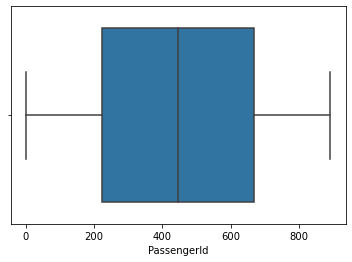

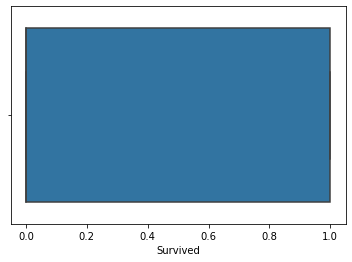

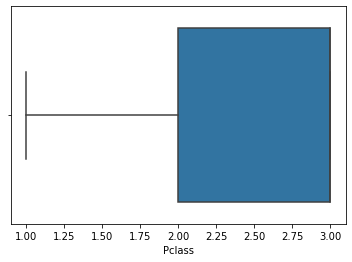

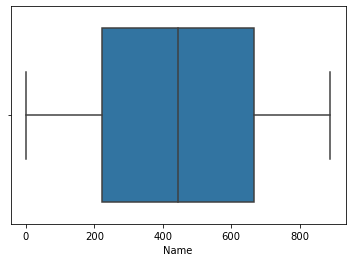

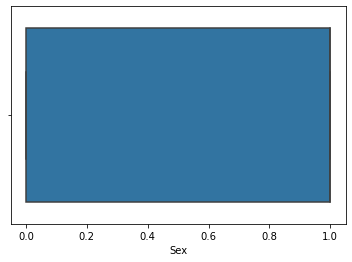

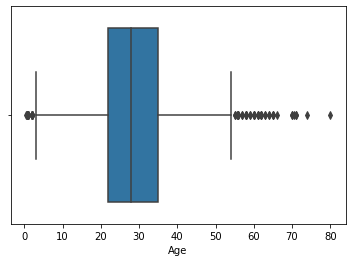

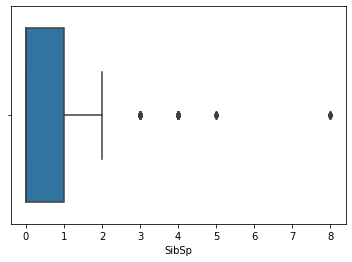

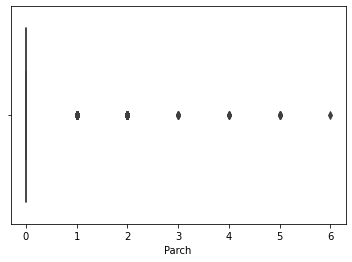

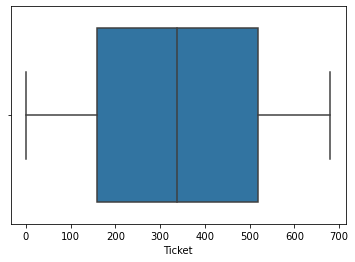

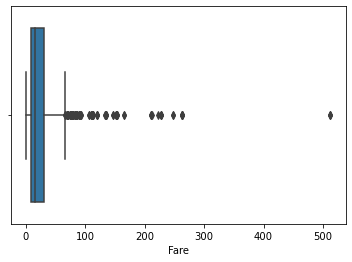

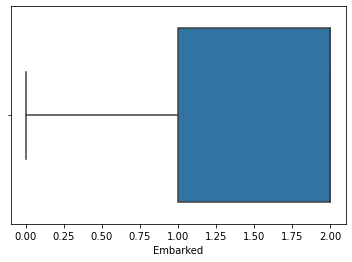

In [38]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

from above we found that Age,sibsp,parch,fare have some otliers.but age has max value 80 so its normal.no outlier in Age column.
sibsp,parch are catagory columns.so no outlier present.
but in fare there is a value more than 500 is present,that is outlier.so we remove it

In [39]:
from scipy.stats import zscore
z=np.abs(zscore(df['Fare']))
print(np.where(z>3))

(array([ 27,  88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679,
       689, 700, 716, 730, 737, 742, 779], dtype=int64),)


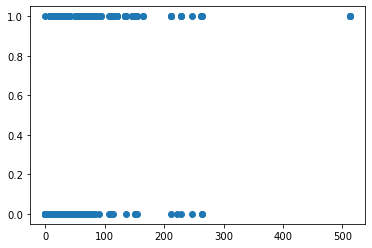

In [40]:
plt.scatter(x=df['Fare'],y=df['Survived'])

In [41]:
df.loc[[ 27,  88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679,
       689, 700, 716, 730, 737, 742, 779],:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,28,0,1,260.0,1,19.0,3,2,95.0,263.0000,2
88,89,1,1,259.0,0,23.0,3,2,95.0,263.0000,2
118,119,0,1,70.0,1,24.0,0,1,585.0,247.5208,0
258,259,1,1,844.0,0,35.0,0,0,608.0,512.3292,0
299,300,1,1,71.0,0,50.0,0,1,585.0,247.5208,0
311,312,1,1,710.0,0,18.0,2,2,602.0,262.3750,0
341,342,1,1,258.0,0,24.0,3,2,95.0,263.0000,2
377,378,0,1,862.0,1,27.0,0,2,27.0,211.5000,0
380,381,1,1,86.0,0,42.0,0,0,610.0,227.5250,0
438,439,0,1,261.0,1,64.0,1,4,95.0,263.0000,2


from above we clearly see in Fare column index no. 258,679,737 have higher value.so we remove it

In [42]:
df=df.drop([258,679,737],axis=0)

In [43]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108.0,1,22.0,1,0,523.0,7.2500,2
1,2,1,1,190.0,0,38.0,1,0,596.0,71.2833,0
2,3,1,3,353.0,0,26.0,0,0,669.0,7.9250,2
3,4,1,1,272.0,0,35.0,1,0,49.0,53.1000,2
4,5,0,3,15.0,1,35.0,0,0,472.0,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1,27.0,0,0,101.0,13.0000,2
887,888,1,1,303.0,0,19.0,0,0,14.0,30.0000,2
888,889,0,3,413.0,0,28.0,1,2,675.0,23.4500,2
889,890,1,1,81.0,1,26.0,0,0,8.0,30.0000,0


Now we divide  independent and dependent variable as x and y respectively

checking skewness 

In [44]:
df.skew()

PassengerId    0.002394
Survived       0.487605
Pclass        -0.640238
Name          -0.000673
Sex           -0.618628
Age            0.514256
SibSp          3.688909
Parch          2.748427
Ticket         0.005675
Fare           3.187877
Embarked      -1.281891
dtype: float64

though Pclass,Sex,SibSp,Embarked are catagory columns.so no need to do transformation.but in fair column skewness is present.so we have to remove skewness for better accuracy

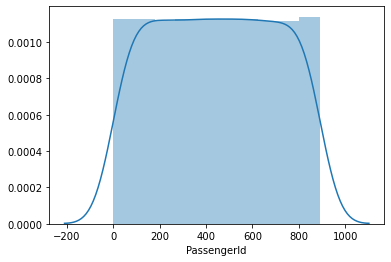

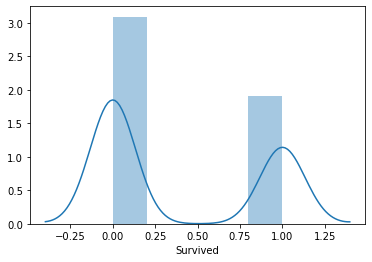

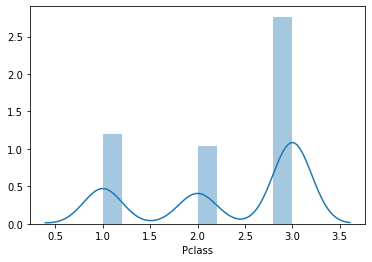

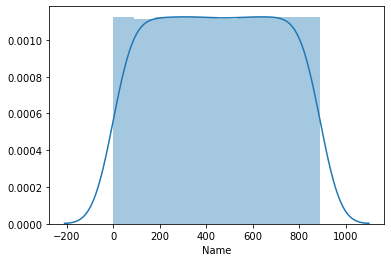

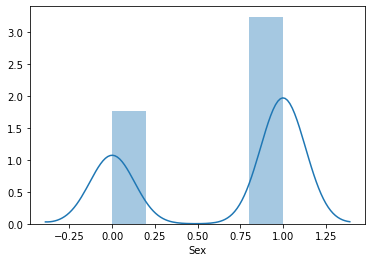

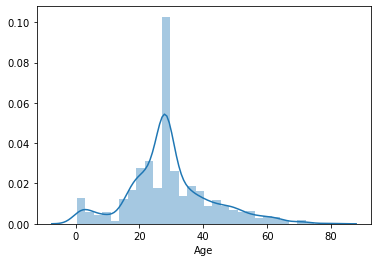

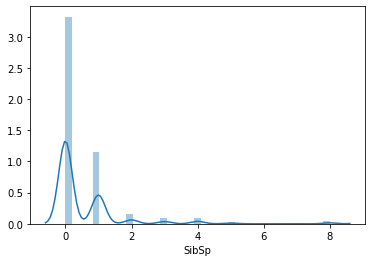

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


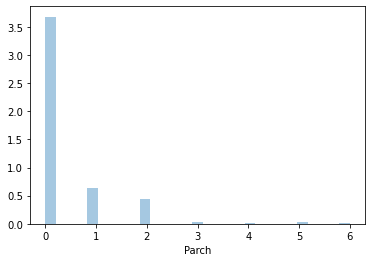

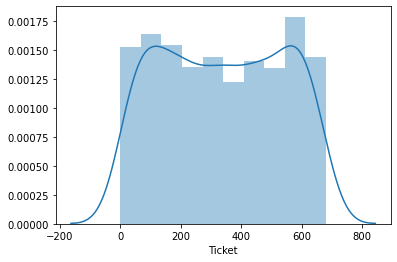

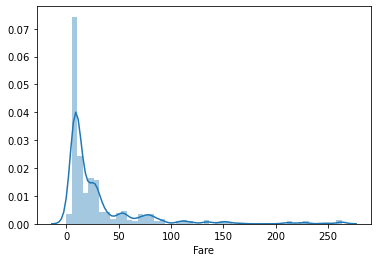

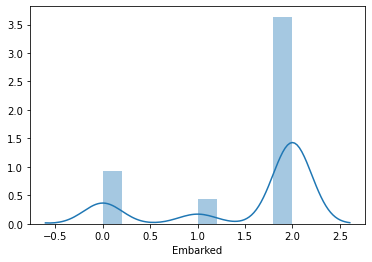

In [45]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

In [46]:
from sklearn.preprocessing import power_transform

In [47]:
fare=power_transform(df['Fare'].values.reshape(-1,1))

In [48]:
df['Fare']=fare

In [49]:
df.skew()

PassengerId    0.002394
Survived       0.487605
Pclass        -0.640238
Name          -0.000673
Sex           -0.618628
Age            0.514256
SibSp          3.688909
Parch          2.748427
Ticket         0.005675
Fare          -0.029667
Embarked      -1.281891
dtype: float64

skewness is removed

Now we divide independent and dependent variable as x and y respectively

In [52]:
x=df.drop('Survived',axis=1)
y=df['Survived']

now we have to divide dataset in train and test  and finding best random state

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt=DecisionTreeClassifier()

In [54]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    dt.fit(x_train,y_train)
    y_pred=dt.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy is",maxacc,"on random_state",maxrs)

best accuracy is 0.8277153558052435 on random_state 168


random_state=168

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=168)
    

applying different classifier model for better accuracy

In [56]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [57]:
model=[SVC(),DecisionTreeClassifier(),LogisticRegression(),GaussianNB(),RandomForestClassifier()]

In [58]:
for i in model:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(i)
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    

SVC()
0.6254681647940075
              precision    recall  f1-score   support

           0       0.62      0.99      0.77       165
           1       0.67      0.04      0.07       102

    accuracy                           0.63       267
   macro avg       0.65      0.51      0.42       267
weighted avg       0.64      0.63      0.50       267

[[163   2]
 [ 98   4]]
DecisionTreeClassifier()
0.8277153558052435
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       165
           1       0.75      0.81      0.78       102

    accuracy                           0.83       267
   macro avg       0.82      0.83      0.82       267
weighted avg       0.83      0.83      0.83       267

[[138  27]
 [ 19  83]]


C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
0.7940074906367042
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       165
           1       0.72      0.75      0.74       102

    accuracy                           0.79       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.80      0.79      0.79       267

[[135  30]
 [ 25  77]]
GaussianNB()
0.7790262172284644
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       165
           1       0.67      0.83      0.74       102

    accuracy                           0.78       267
   macro avg       0.77      0.79      0.77       267
weighted avg       0.80      0.78      0.78       267

[[123  42]
 [ 17  85]]
RandomForestClassifier()
0.8576779026217228
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       165
           1       0.80      0.83      0.82       102

    accuracy        

for overfitting problem we use cross_val_score

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
model=[SVC(),DecisionTreeClassifier(),LogisticRegression(),GaussianNB(),RandomForestClassifier()]

calcualte cv and mean  cvscores of models

In [61]:
svc=SVC()
for i in range(2,10):
    cvscore=cross_val_score(svc,x_train,y_train,cv=i)
    print('for',i,'accuracy is',cvscore.mean())

for 2 accuracy is 0.6135203817031428
for 3 accuracy is 0.6135265700483091
for 4 accuracy is 0.6135235732009926
for 5 accuracy is 0.6135354838709677
for 6 accuracy is 0.608709858103062
for 7 accuracy is 0.607069896395739
for 8 accuracy is 0.6006701631701632
for 9 accuracy is 0.607085346215781


In [62]:
cv=3

In [63]:
for i in model:
    cvscore=cross_val_score(i,x_train,y_train,cv=3)
    print('for',i,'accuracy_score is',cvscore.mean())

for SVC() accuracy_score is 0.6135265700483091
for DecisionTreeClassifier() accuracy_score is 0.7520128824476652


C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

for LogisticRegression() accuracy_score is 0.7777777777777778
for GaussianNB() accuracy_score is 0.7729468599033815
for RandomForestClassifier() accuracy_score is 0.8260869565217391


from above we conclude that randomforestclassifier is the best model so we hypertuning the model for better accuracy

In [64]:
from sklearn.model_selection import GridSearchCV

choosing best parameter for this model

In [65]:
parameter={'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}

In [66]:
rf=RandomForestClassifier()
gscv=GridSearchCV(rf,parameter,cv=5)
gscv.fit(x_train,y_train)
gscv.best_params_

{'criterion': 'entropy', 'max_features': 'log2'}

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',max_features='log2')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc

0.8614232209737828

saving the model 

In [68]:
import pickle
filename='titanic.pkl'
pickle.dump(rf,open(filename,'wb'))